# Model Testbed

In [1]:
using AutomotiveDrivingModels
include(Pkg.dir("AutomotiveDrivingModels", "src", "viz", "AutoViz.jl"))
using AutoViz

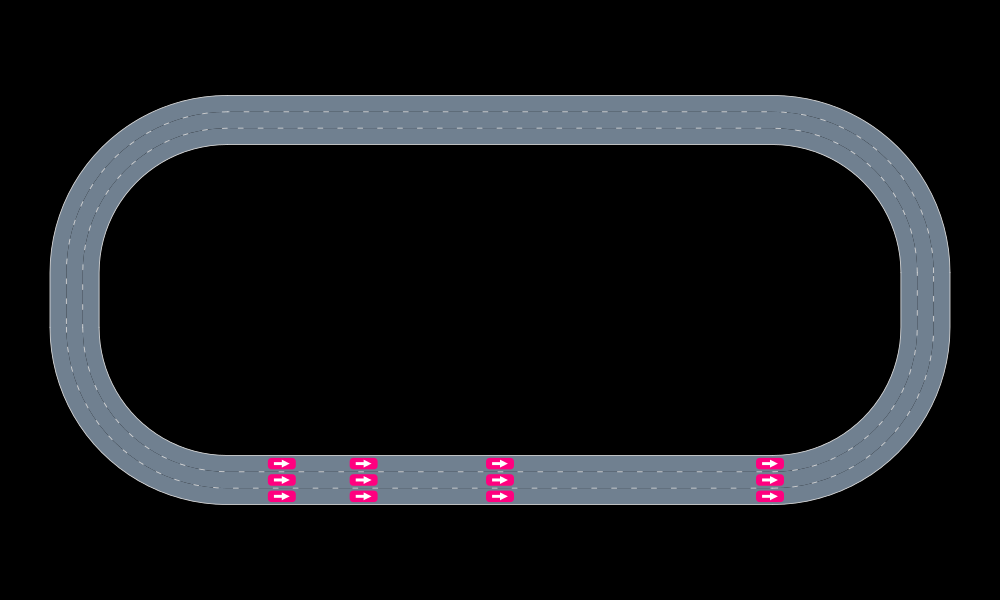

In [2]:
using Reactive, Interact

roadway = gen_stadium_roadway(3)
scene = Scene()
for x in (10,25,50,99.5)
    for j in 0:2
        push!(scene,Vehicle(VehicleState(VecSE2(x,-j*DEFAULT_LANE_WIDTH,0.0), roadway, 20.0 + j), 
                            VehicleDef(1, AgentClass.CAR, 4.826, 1.81)))
    end
end

render(scene, roadway)

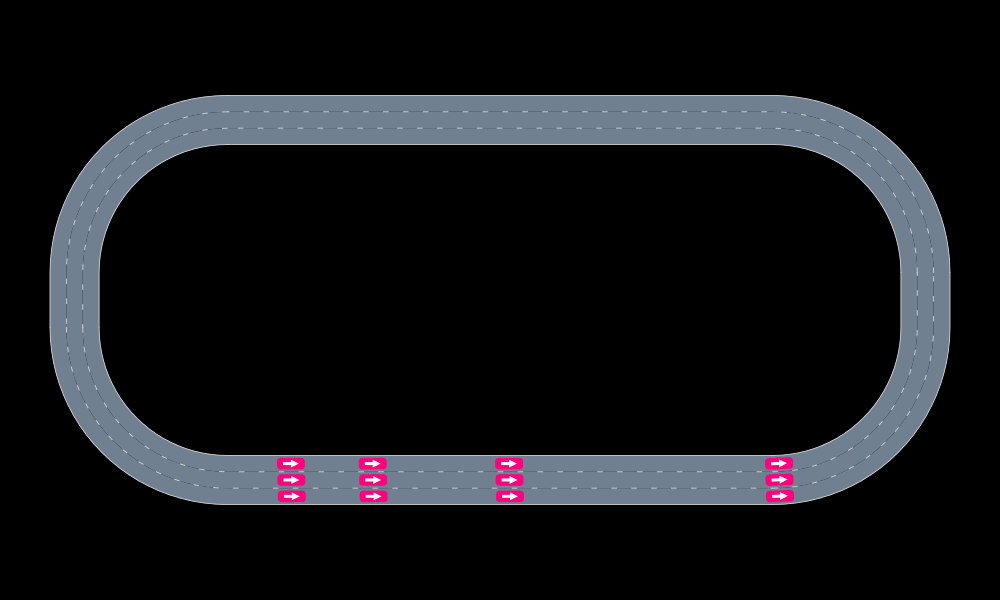

In [3]:
framerate = 24
context = IntegratedContinuous(1/framerate,3)
models = Dict{Int, DriverModel}()
models[1] = LatLonSeparableDriver(context, ProportionalLaneTracker(), ProportionalSpeedTracker(v_des = 21.0))
models[2] = LatLonSeparableDriver(context, ProportionalLaneTracker(), ProportionalSpeedTracker(v_des = 21.0))
models[3] = LatLonSeparableDriver(context, ProportionalLaneTracker(), ProportionalSpeedTracker(v_des = 21.0))
actions = get_actions!(Array(LatLonAccel, length(scene)), scene, roadway, models)

function drawsim(t)
    get_actions!(actions, scene, roadway, models)
    tick!(scene, roadway, actions, models)
    render(scene, roadway)
end

ticks = fps(framerate)
timestamps = map(_ -> time(), ticks)
map(drawsim, timestamps)